![amazon_logo](banner.png)
___

In [9]:
import pandas as pd
import numpy as np

#for plots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

#libraries for NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vlad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 3 - Outliers & NLP
    a) Importing data
    
    b) Create 'State' Columns
        
    c) Natural Language Processing (Review Data)
        - cleaning blurb variable
            - punctuation
            - stopwords
            - lemmatization
        - writing and saving corpus
    
    d) NLP (Q/A Data)

### a) Importing data
##### Use 'cleaned_amazon_data.csv' to begin cleaning

In [2]:
#import .csv file
cleaned_df = pd.read_csv("cleaned_amazon_data.csv")

cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned_df.shape)
cleaned_df.head(1)

(159367, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,total_review
0,A1HK2FQW6KXQB2,097293751X,"Amanda Johnsen ""Amanda E. Johnsen""","[0, 0]",Perfect for new parents. We were able to keep ...,5,Awesine,2013-07-16,Awesine Perfect for new parents. We were able ...


### b) Create 'state' column

For the purpose of this experiment, I'll bin the overall star reviews into __two__ categories: __{Bad: 1-4 Overall}, {Good: 5 Overall}__. I feel like this will best represent the general consensus among Amazon users as to what level of stars signifies a product being successful vs. unsuccessful.

In [3]:
print(cleaned_df['overall'].value_counts())

5    92579
4    32723
3    17144
2     9155
1     7766
Name: overall, dtype: int64


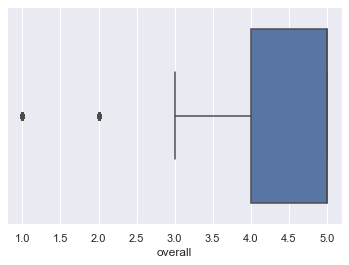

In [4]:
#make a boxplot of 'overall' column
sns.boxplot(x=cleaned_df['overall'])

In [5]:
#bin 'overall' column into 'Good' & 'Bad' overall ratings
bins = [0, 4, 5]
labels = ['Bad', 'Good']
cleaned_df['state'] = pd.cut(cleaned_df['overall'], bins=bins, labels=labels)
cleaned_df['state'].value_counts()

Good    92579
Bad     66788
Name: state, dtype: int64

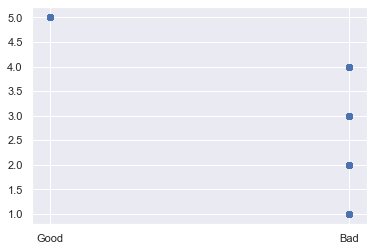

In [6]:
x = cleaned_df['state']
y = cleaned_df['overall']

plt.scatter(x, y)
plt.show()

In [7]:
#reset index
cleaned_df.reset_index(drop=True,inplace=True)

### c) Natural Language Processing (Review Data)

##### Clean the first row to check

In [8]:
#create 'text' variable of every review
text = pd.DataFrame(cleaned_df['total_review'])

#lets clean the first review as a first step
text['total_review'][0]

"Awesine Perfect for new parents. We were able to keep track of baby's feeding, sleep and diaper change schedule for the first two and a half months of her life. Made life easier when the doctor would ask questions about habits because we had it all right there!"

In [9]:
#only keep letters and replace other symbols with a white space in the first review
review = re.sub('[^a-zA-Z]', ' ', text['total_review'][0])

#change letters to lower-case
review = review.lower()   

#split the first review which is a string into list
review = review.split()

#for loop to remove stop-words and to do lemmatization
wn = WordNetLemmatizer()
review = [wn.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]

#join review back into a string from a list
review = ' '.join(review)

review

'awesine perfect new parent able keep track baby feeding sleep diaper change schedule first two half month life made life easier doctor would ask question habit right'

##### Clean the entire 'total_review' column

In [10]:
print(len(pd.DataFrame(cleaned_df['total_review'])))
length = len(pd.DataFrame(cleaned_df['total_review']))

159367


In [11]:
corpus = []
for i in range(0, 100000):
    #only keep letters and replace other symbols with a white space in the first review
    review = re.sub('[^a-zA-Z]', ' ', text['total_review'][i])

    #change letters to lower-case
    review = review.lower()   
    #split
    review = review.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    review = [wn.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    #join review back into a string from a list
    review = ' '.join(review)
    corpus.append(review)

In [15]:
#write corpus array into a dataframe and save it to a csv for importing into the Step 4 (Classification)
corpus_df = pd.DataFrame(corpus, columns = ['review'])
corpus_df.head()

,review
0,awesine perfect new parent able keep track bab...
1,required new parent book life saver helpful ab...
2,grandmother watching baby help know exactly ba...
3,repeat buyer bought time older son bought newb...
4,great wanted alternative printing daily log sh...


### d) NLP (Q/A Data)

In [19]:
#import .csv file
qa_df = pd.read_csv("amazon_qa_data.csv")

qa_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(qa_df.shape)
qa_df.head()

(28933, 7)


,questionType,asin,answerTime,unixTime,question,answer,answerType
0,open-ended,177036417X,"Apr 16, 2015",1.429168e+09,Does this book contain any vaccination/immuniz...,"Immunization page, yes. School, no.",NaN
1,yes/no,177036417X,"Jul 1, 2014",1.404198e+09,Does this book have a section for the baby sho...,Yes it does,Y
2,yes/no,177036417X,"Jun 9, 2014",1.402297e+09,Is it a religious based book? Just wondering s...,The book does have a lot of bible quotes in it...,?
3,yes/no,177036417X,"May 28, 2014",1.401260e+09,is it 5 years,No. It's mainly for the first year. Everything...,N
4,yes/no,177036417X,"Apr 23, 2014",1.398236e+09,is it a 5 year book?,"Yes, it's a 5-year baby book. I bought this fo...",Y


In [13]:
#create 'text' variable of every question
q_text = pd.DataFrame(qa_df['question'])

#lets clean the first question as a first step
q_text['question'][0]

"Does this book contain any vaccination/immunization pages? Or pages about school? (Most do, yet I don't vax and I homeschool). Thx so much! :)"

In [14]:
question = re.sub('[^a-zA-Z]', ' ', q_text['question'][0])
question = question.lower()   
question = question.split()

wn = WordNetLemmatizer()
question = [wn.lemmatize(word) for word in question if not word in set(stopwords.words('english'))]

question = ' '.join(question)
question

'book contain vaccination immunization page page school yet vax homeschool thx much'

In [15]:
print(len(pd.DataFrame(qa_df['question'])))
length = len(pd.DataFrame(qa_df['question']))

28933


In [16]:
q_corpus = []
for i in range(0, length):
    question = re.sub('[^a-zA-Z]', ' ', q_text['question'][i])
    question = question.lower()   
    question = question.split()
    
    wn = WordNetLemmatizer()
    question = [wn.lemmatize(word) for word in question if not word in set(stopwords.words('english'))]
    
    question = ' '.join(question)
    q_corpus.append(question)

In [17]:
#write q_corpus array into a dataframe and save it to a csv
q_corpus_df = pd.DataFrame(q_corpus, columns = ['question'])
q_corpus_df.head()

,question
0,book contain vaccination immunization page pag...
1,book section baby shower
2,religious based book wondering since pic bible...
3,year
4,year book


### End of Step 3

In [16]:
#write corpus_df to a .csv
corpus_df.to_csv('amazon_corpus_data.csv')

In [17]:
#write cleaned_df to a .csv
cleaned_df.to_csv('amazon_cleaned2_data.csv')

In [20]:
#write q_corpus_df to a .csv
q_corpus_df.to_csv('amazon_q_corpus_data.csv')